# ISYE6644 Project - Advanced Pandemic Flu Spread

---

# Data Dictionary

<div style="font-size:30px;">

| Variable Name                 | Type    | Description | Example Value |
|-------------------------------|---------|-------------|---------------|
| `population_size`             | Integer | The total number of individuals in the population. | 1000 |
| `initial_infectious_count`    | Integer | The number of individuals who are infectious at the start. | 1 |
|`initial_vaccinated_count` |Integer | Number of vaccinated individuals at the start (assuming vaccination hasn't started yet)| 0|
| `infection_probability`       | Float   | The probability that an infectious individual will transmit the flu to a susceptible person. | 0.02 |
| `incubation_period`           | Integer | The number of days between a person becoming infected and when they start to become infectious. | 2 |
| `recovery_rate`               | Float   | The fraction or proportion of infected individuals who recover each day. | 0.1 |
| `death_rate`                  | Float   | The fraction or proportion of infected individuals who die each day. | 0.01 |
| `permanent_immunity`          | Boolean | Indicates whether recovered individuals are permanently immune. | True |
| `mitigation_effectiveness`    | Float   | A measure of how effective mitigation strategies are at reducing transmission. For example if the value is 0.5, <br> it suggests that the mitigation measures in place (like masking and social distancing) reduce the transmission of the flu by 50%. <br> So, if normally 10 out of 100 susceptible individuals would get infected, with these mitigation measures, only 5 out of 100 would get infected.| 0.5 |
| `vaccination_rate`            | Float   | The rate at which the population can be vaccinated per day. | 0.05 |
| `vaccine_supply_reliability`  | Boolean | Indicates whether the vaccine supply is reliable. | False |
| `vaccine_efficacy_one_dose`   | Float   | The efficacy of the vaccine after one dose. For example if the value is 0.5, <br> it indicates that receiving one dose of the vaccine reduces the chance of getting the flu by 50% compared to someone who is not vaccinated at all. <br> For example, if non-vaccinated individuals have a 10% chance of contracting the flu when exposed, those who have received one dose would have a 5% chance.| 0.5 |
| `vaccine_efficacy_two_doses`  | Float   | The efficacy of the vaccine after two doses. For example if the value if 0.95, <br> it means that receiving the full two-dose regimen of the vaccine is 95% effective in preventing flu infection. <br> If there's a 10% chance of a non-vaccinated individual getting the flu, those who have received both doses would have only a 0.5% chance of getting sick upon exposure.| 0.95 |
| `vaccination_strategy`        | Integer | The number representing the vaccination strategy (e.g., 1 for one-dose, 2 for full vaccination). | 1 |
| `behavioral_compliance`       | Float   | The level of adherence to mitigation measures by the population. | 0.8 |
| `natural_immunity_rate`       | Float   | The percentage of the population with natural immunity. | 0.1 |
| `stochastic_variation`        | Float   | A factor to introduce randomness into the simulation. | 0.05 |

</div>

# Step 1: Define the Initial Conditions

In [1]:
# Initial conditions
population_size = 3000000  # Total population size
initial_infectious_count = 10  # Number of infectious individuals at the start
initial_vaccinated_count = 0  # Number of vaccinated individuals at the start (assuming vaccination hasn't started yet)
infection_probability = 0.02  # Probability of transmission from an infectious individual to a susceptible one,We are using 0.02 because it is the same as Project 3's value
vaccine_cost = 120      # Vaccine cost according to https://www.kff.org/coronavirus-covid-19/issue-brief/how-much-could-covid-19-vaccines-cost-the-u-s-after-commercialization/
hospital_rate = 0.001     # hospital rate according to CDC
hospital_fee = 11275       #hospital fee for each patient

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count

# Setting up counts for tracking the simulation
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0  # Initial number of recovered individuals
death_count = 0  # Initial number of deaths

'''
Work From Home Cost
Quarantine Economic Cost
'''


'\nWork From Home Cost\nQuarantine Economic Cost\n'

---

# Step 2: Simulation Loop

## Part A: Calculating New Infections

Determine the number of new infections based on the current number of infectious individuals, the susceptible population, and the infection probability. This part will include random elements to simulate the unpredictability of who gets infected.

In [2]:
import random

# Define the range for the number of interactions per infectious individual
min_interactions_per_day = 0
max_interactions_per_day = 15

# Initialize new infections for the day
new_infections = 0

# Simulate interactions for each infectious individual
for _ in range(infectious_count): # this for loop goes through person-by-person
    # Determine the number of interactions for this individual using a uniform distribution
    interactions_today = random.randint(min_interactions_per_day, max_interactions_per_day)

    for _ in range(interactions_today):
        # Check if the interaction results in a new infection
        if random.random() < infection_probability and susceptible_count > 0:
          #there's a 20% chance that a random draw falls below this value. This mirrors the real-world scenario where,
          #statistically, 20 out of 100 similar interactions would result in transmission.
            new_infections += 1
            susceptible_count -= 1  # A susceptible individual becomes infected

# Update the counts based on new infections
infectious_count += new_infections

# Print the results for demonstration
print(f"New infections today: {new_infections}")
print(f"Total infectious count: {infectious_count}")
print(f"Susceptible count: {susceptible_count}")


New infections today: 2
Total infectious count: 12
Susceptible count: 2999988


**Calculating New Infections** focuses on how many new infections occur on a given day, based on the number of infectious individuals, their interactions with susceptible individuals, and the probability of transmission.

---

## Part B: Updating Status

Assumptions
- Once infected, individuals remain infectious for a fixed period (e.g., 5 days) before they either recover or, in some cases, die.
- We'll use a fixed recovery rate to determine the fraction of infectious individuals who recover each day.
- Similarly, a fixed death rate determines the fraction of infectious individuals who die each day.

This part of the simulation will involve:
- Decreasing the `infectious_count` by the number of individuals who recover or die.
- Increasing the `recovered_count` by the number of recoveries.
- Increasing the `death_count` by the number of deaths.

For simplicity, in this example, we'll ignore the detailed timing of infection and focus on the overall process. In a more complex model, you'd track the day each individual became infected to accurately model their progression through the disease.



### Old Code (Commented Out)

In [ ]:
'''
# Assuming these rates are defined; for example:
recovery_rate = 0.1  # 10% of infectious individuals recover each day
death_rate = 0.01  # 1% of infectious individuals die each day

# Calculate the number of recoveries and deaths from the current infectious population
recoveries_today = int(infectious_count * recovery_rate)
deaths_today = int(infectious_count * death_rate)

# Update the counts
infectious_count -= (recoveries_today + deaths_today)
recovered_count += recoveries_today
death_count += deaths_today

# Note: In a real simulation, you'd also need to account for individuals moving from 'susceptible' to 'infectious'
# due to new infections, which we handled in the previous step.

print(f"Recoveries today: {recoveries_today}")
print(f"Deaths today: {deaths_today}")
print(f"Current infectious count: {infectious_count}")
print(f"Total recovered count: {recovered_count}")
print(f"Total death count: {death_count}")
'''

'\n# Assuming these rates are defined; for example:\nrecovery_rate = 0.1  # 10% of infectious individuals recover each day\ndeath_rate = 0.01  # 1% of infectious individuals die each day\n\n# Calculate the number of recoveries and deaths from the current infectious population\nrecoveries_today = int(infectious_count * recovery_rate)\ndeaths_today = int(infectious_count * death_rate)\n\n# Update the counts\ninfectious_count -= (recoveries_today + deaths_today)\nrecovered_count += recoveries_today\ndeath_count += deaths_today\n\n# Note: In a real simulation, you\'d also need to account for individuals moving from \'susceptible\' to \'infectious\'\n# due to new infections, which we handled in the previous step.\n\nprint(f"Recoveries today: {recoveries_today}")\nprint(f"Deaths today: {deaths_today}")\nprint(f"Current infectious count: {infectious_count}")\nprint(f"Total recovered count: {recovered_count}")\nprint(f"Total death count: {death_count}")\n'

---

### New Code

Includes a Stochastic Element to the Recovery and Death Rates

In [3]:
import numpy as np  # Importing numpy for binomial distribution

# Assuming these rates are defined; for example:
recovery_rate = 0.1  # 10% chance of recovery each day
death_rate = 0.01  # 1% chance of death each day

# Calculate the number of recoveries and deaths from the current infectious population stochastically
recoveries_today = np.random.binomial(infectious_count, recovery_rate)
deaths_today = np.random.binomial(infectious_count, death_rate)

# Make sure we don't have more recoveries and deaths than the current infectious count
total_changes = recoveries_today + deaths_today
if total_changes > infectious_count:
    # Adjust recoveries if the sum of recoveries and deaths exceeds the infectious count
    excess = total_changes - infectious_count
    recoveries_today -= excess

# Update the counts
infectious_count -= total_changes
recovered_count += recoveries_today
death_count += deaths_today

print(f"Recoveries today: {recoveries_today}")
print(f"Deaths today: {deaths_today}")
print(f"Current infectious count: {infectious_count}")
print(f"Total recovered count: {recovered_count}")
print(f"Total death count: {death_count}")


Recoveries today: 2
Deaths today: 0
Current infectious count: 10
Total recovered count: 2
Total death count: 0


**Updating Status** deals with the progression of the disease within the infected population, updating how many individuals recover or die on that day, thereby reducing the number of infectious individuals and increasing the numbers of recovered or deceased.

**Note** The logic in both "Part 1: Calculating New Infections" and "Part 2: Updating Status" blocks of code are designed to simulate the events of one day in the pandemic spread within the population.

---

## Part C: Applying Vaccination

If the simulation includes vaccination, increment the number of vaccinated individuals based on the vaccination rate. Adjust the susceptible and vaccinated counts accordingly.

### Old Code (Commented Out)

In [ ]:
'''
# Define the dynamic vaccination rate as a percentage of the susceptible population
vaccination_rate_percent = 0.01  # 1% of the susceptible population per day

# Calculate the number of vaccines to be administered today based on this percentage
vaccines_administered_today = int(susceptible_count * vaccination_rate_percent)

# Ensure we do not vaccinate more individuals than there are susceptible individuals
vaccines_administered_today = min(vaccines_administered_today, susceptible_count)

# Update the counts based on vaccination
susceptible_count -= vaccines_administered_today
vaccinated_count += vaccines_administered_today

# Print the results for demonstration
print(f"Vaccines administered today: {vaccines_administered_today}")
print(f"Current susceptible count: {susceptible_count}")
print(f"Total vaccinated count: {vaccinated_count}")
'''

'\n# Define the dynamic vaccination rate as a percentage of the susceptible population\nvaccination_rate_percent = 0.01  # 1% of the susceptible population per day\n\n# Calculate the number of vaccines to be administered today based on this percentage\nvaccines_administered_today = int(susceptible_count * vaccination_rate_percent)\n\n# Ensure we do not vaccinate more individuals than there are susceptible individuals\nvaccines_administered_today = min(vaccines_administered_today, susceptible_count)\n\n# Update the counts based on vaccination\nsusceptible_count -= vaccines_administered_today\nvaccinated_count += vaccines_administered_today\n\n# Print the results for demonstration\nprint(f"Vaccines administered today: {vaccines_administered_today}")\nprint(f"Current susceptible count: {susceptible_count}")\nprint(f"Total vaccinated count: {vaccinated_count}")\n'

### New Code

Include a Stochastic Element to the Vaccination Rate

In [4]:
import numpy as np  # Ensure numpy is imported for random number generation

# Define the base vaccination rate as a percentage of the susceptible population
base_vaccination_rate_percent = 0.01  # Base rate of 1% of the susceptible population per day

# Introduce daily variation in the vaccination rate (+/- 0.5% as an example)
daily_variation_percent = 0.005  # Max daily variation in the vaccination rate

# Calculate a random daily vaccination rate within the specified range
daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)

# Calculate the number of vaccines to be administered today based on this stochastic rate
vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)

# Ensure we do not vaccinate more individuals than there are susceptible individuals
vaccines_administered_today = min(vaccines_administered_today, susceptible_count)

# Update the counts based on vaccination
susceptible_count -= vaccines_administered_today
vaccinated_count += vaccines_administered_today

# Calculate the total fee for the vaccin
vaccine_cost_today = vaccine_cost * vaccines_administered_today
total_vaccine_cost = vaccine_cost * vaccinated_count

# Print the results for demonstration
print(f"Vaccines administered today: {vaccines_administered_today}")
print(f"Current susceptible count: {susceptible_count}")
print(f"Total vaccinated count: {vaccinated_count}")
print(f"Vaccine cost today: {vaccine_cost_today}")
print(f"Total vaccine cost: {total_vaccine_cost}")

Vaccines administered today: 19665
Current susceptible count: 2980323
Total vaccinated count: 19665
Vaccine cost today: 2359800
Total vaccine cost: 2359800


**Applying Vaccinations** models the vaccination effort for the day, moving a certain number of individuals from the susceptible category to the vaccinated category based on the vaccination rate.

---

## Combining Parts A, B and C

I combined the three aforementioned blocks

1. "Calculating New Infections,"

2. "Updating Status" with stochastic elements, and

3. "Applying Vaccination" with stochastic variation

Into one concise code snippet

In [5]:
import numpy as np
import random

# Initial conditions
population_size = 3000000
initial_infectious_count = 10
initial_vaccinated_count = 0
infection_probability = 0.02
recovery_rate = 0.1
death_rate = 0.01
base_vaccination_rate_percent = 0.01
daily_variation_percent = 0.005

# Initial state
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0
death_count = 0

# Define the range for the number of interactions per infectious individual
min_interactions_per_day = 5
max_interactions_per_day = 15

# Simulate a day in the pandemic
# Block 1: Calculating New Infections
new_infections = 0
for _ in range(infectious_count):
    interactions_today = random.randint(min_interactions_per_day, max_interactions_per_day)
    for _ in range(interactions_today):
        if random.random() < infection_probability and susceptible_count > 0:
            new_infections += 1
            susceptible_count -= 1
infectious_count += new_infections

# Block 2: Updating Status with Stochastic Elements
recoveries_today = np.random.binomial(infectious_count, recovery_rate)
deaths_today = np.random.binomial(infectious_count, death_rate)
infectious_count -= (recoveries_today + deaths_today)
recovered_count += recoveries_today
death_count += deaths_today

# Block 3: Applying Vaccination with Stochastic Variation
daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)
vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)
vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
susceptible_count -= vaccines_administered_today
vaccinated_count += vaccines_administered_today

# Block 4:Calculate the total fee for the vaccin
vaccine_cost_today = vaccine_cost * vaccines_administered_today
total_vaccine_cost = vaccine_cost * vaccinated_count

# Print the results for the day
print(f"New infections today: {new_infections}")
print(f"Recoveries today: {recoveries_today}")
print(f"Deaths today: {deaths_today}")
print(f"Vaccines administered today: {vaccines_administered_today}")
print(f"Current susceptible count: {susceptible_count}")
print(f"Total infectious count: {infectious_count}")
print(f"Total recovered count: {recovered_count}")
print(f"Total death count: {death_count}")
print(f"Total vaccinated count: {vaccinated_count}")
print(f"Vaccine cost today: {vaccine_cost_today}")
print(f"Total vaccine cost: {total_vaccine_cost}")


New infections today: 3
Recoveries today: 0
Deaths today: 0
Vaccines administered today: 42218
Current susceptible count: 2957769
Total infectious count: 13
Total recovered count: 0
Total death count: 0
Total vaccinated count: 42218
Vaccine cost today: 5066160
Total vaccine cost: 5066160


---

## Part D: Repeating the Simulation over a few days

The simulation has to be decidable and terminate at some point. We need to define the terminating conditions:

1. Simulation stops when 70% of the population is vaccinated.This value can be adjusted.

2. Simulation also could stop if there are no new infections on a given day.

### Old Code (Commented Out)

In [ ]:
'''
import random

# Initial conditions
population_size = 10000
initial_infectious_count = 10
initial_vaccinated_count = 0
infection_probability = 0.02
recovery_rate = 0.1
death_rate = 0.01
vaccination_rate_percent = 0.01  # Dynamic vaccination rate: 1% of the susceptible population per day

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0
death_count = 0
total_contracted = initial_infectious_count  # Including initial infectious individuals

# Simulation parameters
simulation_days = 10000  # Maximum number of days to simulate
vaccination_threshold = 0.7 * population_size  # 70% of the population

# Simulation loop
day = 0
while day < simulation_days and vaccinated_count < vaccination_threshold:
    day += 1
    new_infections = 0

    # Calculating New Infections
    for _ in range(infectious_count):
        interactions_today = random.randint(5, 15)
        for _ in range(interactions_today):
            if random.random() < infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
                total_contracted += 1  # Update total contracted

    # Updating Status
    recoveries_today = int(infectious_count * recovery_rate)
    deaths_today = int(infectious_count * death_rate)
    infectious_count = max(0, infectious_count - recoveries_today - deaths_today + new_infections)
    recovered_count += recoveries_today
    death_count += deaths_today

    # Applying Vaccination
    vaccines_administered_today = int(susceptible_count * vaccination_rate_percent)
    vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
    susceptible_count -= vaccines_administered_today
    vaccinated_count += vaccines_administered_today

# Final outcomes
percentage_vaccinated = (vaccinated_count / population_size) * 100
percentage_recovered = (recovered_count / population_size) * 100
percentage_dead = (death_count / population_size) * 100
percentage_contracted_flu = (total_contracted / population_size) * 100

print(f"Simulation ended on day {day}.")
print(f"Percentage vaccinated: {percentage_vaccinated:.2f}%")
print(f"Percentage recovered: {percentage_recovered:.2f}%")
print(f"Percentage dead: {percentage_dead:.2f}%")
print(f"Percentage contracted the flu: {percentage_contracted_flu:.2f}%")
'''

'\nimport random\n\n# Initial conditions\npopulation_size = 10000\ninitial_infectious_count = 10\ninitial_vaccinated_count = 0\ninfection_probability = 0.02\nrecovery_rate = 0.1\ndeath_rate = 0.01\nvaccination_rate_percent = 0.01  # Dynamic vaccination rate: 1% of the susceptible population per day\n\n# Calculating the initial number of susceptible individuals\nsusceptible_count = population_size - initial_infectious_count - initial_vaccinated_count\ninfectious_count = initial_infectious_count\nvaccinated_count = initial_vaccinated_count\nrecovered_count = 0\ndeath_count = 0\ntotal_contracted = initial_infectious_count  # Including initial infectious individuals\n\n# Simulation parameters\nsimulation_days = 10000  # Maximum number of days to simulate\nvaccination_threshold = 0.7 * population_size  # 70% of the population\n\n# Simulation loop\nday = 0\nwhile day < simulation_days and vaccinated_count < vaccination_threshold:\n    day += 1\n    new_infections = 0\n\n    # Calculating New

Simulation seems to hit the end date consistently without hitting the vaccination targets. Let's try again

### New Code - Simulation without any Plots

In [6]:
import numpy as np
import random

# Initial conditions
population_size = 3000000
initial_infectious_count = 10
initial_vaccinated_count = 0
infection_probability = 0.02
recovery_rate = 0.1
death_rate = 0.01
base_vaccination_rate_percent = 0.01  # Base rate of 1% of the susceptible population per day
daily_variation_percent = 0.005  # Max daily variation in the vaccination rate

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0
death_count = 0
total_contracted = initial_infectious_count  # Including initial infectious individuals

# Simulation parameters
simulation_days = 300  # Adjust as needed
vaccination_threshold = 0.7 * population_size  # 70% of the population

# Simulation loop
day = 0
while day < simulation_days and vaccinated_count < vaccination_threshold:
    day += 1
    new_infections = 0

    # Block 1: Calculating New Infections
    for _ in range(infectious_count):
        interactions_today = random.randint(5, 15)
        for _ in range(interactions_today):
            if random.random() < infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
                total_contracted += 1  # Update total contracted

    # Block 2: Updating Status with Stochastic Elements
    recoveries_today = np.random.binomial(infectious_count, recovery_rate)
    deaths_today = np.random.binomial(infectious_count, death_rate)
    infectious_count -= (recoveries_today + deaths_today)
    recovered_count += recoveries_today
    death_count += deaths_today
    infectious_count += new_infections  # Add new infections after updating recoveries and deaths

    # Block 3: Applying Vaccination with Stochastic Variation
    daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)
    vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)
    vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
    susceptible_count -= vaccines_administered_today
    vaccinated_count += vaccines_administered_today

    # Block 4:Calculate the total fee for the vaccin
    vaccine_cost_today = vaccine_cost * vaccines_administered_today
    total_vaccine_cost = vaccine_cost * vaccinated_count

    # Check if the vaccinated count has reached the threshold
    if vaccinated_count >= vaccination_threshold:
        break

# Final outcomes
percentage_vaccinated = (vaccinated_count / population_size) * 100
percentage_recovered = (recovered_count / population_size) * 100
percentage_dead = (death_count / population_size) * 100
percentage_contracted_flu = (total_contracted / population_size) * 100

print(f"Simulation ended on day {day}.")
print(f"Percentage vaccinated: {percentage_vaccinated:.2f}%")
print(f"Percentage recovered: {percentage_recovered:.2f}%")
print(f"Percentage dead: {percentage_dead:.2f}%")
print(f"Percentage contracted the flu: {percentage_contracted_flu:.2f}%")
print(f"Vaccine cost today: {vaccine_cost_today}")
print(f"Total vaccine cost: {total_vaccine_cost}")


Simulation ended on day 300.
Percentage vaccinated: 68.45%
Percentage recovered: 28.67%
Percentage dead: 2.88%
Percentage contracted the flu: 31.55%
Vaccine cost today: 0
Total vaccine cost: 246422280


---

### New Simulation Code

Includes the Plot for the Counts of:

1. Vaccinated
2. Recovered
3. Dead
4. Contracted

Simulation ended on day 365.
Percentage vaccinated: 67.78%
Percentage recovered: 29.30%
Percentage dead: 2.92%
Percentage contracted the flu: 32.22%
Total cost: 244012320
Total cost: 10897896.350000001


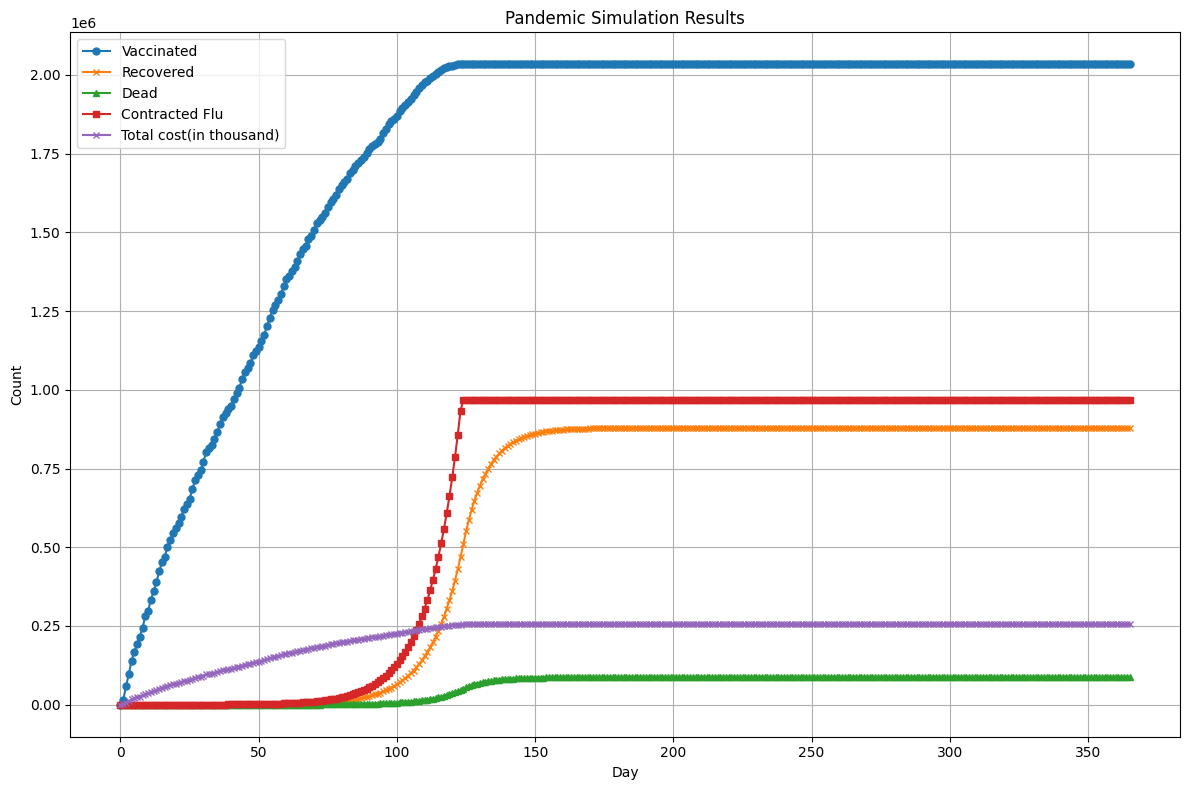

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initial conditions
population_size = 3000000
initial_infectious_count = 10
initial_vaccinated_count = 0
infection_probability = 0.02
recovery_rate = 0.1
death_rate = 0.01
base_vaccination_rate_percent = 0.01  # Base rate of 1% of the susceptible population per day
daily_variation_percent = 0.005  # Max daily variation in the vaccination rate

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0
death_count = 0
total_contracted = initial_infectious_count  # Including initial infectious individuals
total_hospitalized = 0

# Simulation parameters
simulation_days = 365  # Adjust as needed
vaccination_threshold = 0.7 * population_size  # 70% of the population

# Lists to store daily counts for plotting
daily_vaccinated = [initial_vaccinated_count]
daily_recovered = [0]
daily_dead = [0]
daily_contracted = [initial_infectious_count]
daily_cost_list = [0]
daily_hospitalized_list = [0]

# Simulation loop
day = 0
while day < simulation_days and vaccinated_count < vaccination_threshold:
    day += 1
    new_infections = 0

    # Block 1: Calculating New Infections
    for _ in range(infectious_count):
        interactions_today = random.randint(5, 15)
        for _ in range(interactions_today):
            if random.random() < infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
                total_contracted += 1  # Update total contracted

    # Block 2: Updating Status with Stochastic Elements
    recoveries_today = np.random.binomial(infectious_count, recovery_rate)
    deaths_today = np.random.binomial(infectious_count, death_rate)
    infectious_count -= (recoveries_today + deaths_today)
    recovered_count += recoveries_today
    death_count += deaths_today
    infectious_count += new_infections  # Add new infections after updating recoveries and deaths

    # Block 3: Applying Vaccination with Stochastic Variation
    daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)
    vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)
    vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
    susceptible_count -= vaccines_administered_today
    vaccinated_count += vaccines_administered_today

    # Block 4:Calculate the total fee
    daily_hospitalized = new_infections * hospital_rate
    total_hospitalized += daily_hospitalized
    vaccine_cost_today = vaccine_cost * vaccines_administered_today
    total_vaccine_cost = vaccine_cost * vaccinated_count
    total_hospitalized_fee = total_hospitalized * hospital_fee
    total_fee = total_hospitalized_fee + total_vaccine_cost

    # Append daily counts to lists for plotting
    daily_vaccinated.append(vaccinated_count)
    daily_recovered.append(recovered_count)
    daily_dead.append(death_count)
    daily_contracted.append(total_contracted)
    daily_cost_list.append(total_fee/1000)
    daily_hospitalized_list.append(total_hospitalized)

# Reporting Final Outcomes
percentage_vaccinated = (vaccinated_count / population_size) * 100
percentage_recovered = (recovered_count / population_size) * 100
percentage_dead = (death_count / population_size) * 100
percentage_contracted_flu = (total_contracted / population_size) * 100

print(f"Simulation ended on day {day}.")
print(f"Percentage vaccinated: {percentage_vaccinated:.2f}%")
print(f"Percentage recovered: {percentage_recovered:.2f}%")
print(f"Percentage dead: {percentage_dead:.2f}%")
print(f"Percentage contracted the flu: {percentage_contracted_flu:.2f}%")
print(f"Total cost:",total_vaccine_cost)
print(f"Total cost:",total_hospitalized_fee)
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(daily_vaccinated, label='Vaccinated', marker='o', linestyle='-', markersize=5)
plt.plot(daily_recovered, label='Recovered', marker='x', linestyle='-', markersize=5)
plt.plot(daily_dead, label='Dead', marker='^', linestyle='-', markersize=5)
plt.plot(daily_contracted, label='Contracted Flu', marker='s', linestyle='-', markersize=5)
plt.plot(daily_cost_list, label='Total cost(in thousand)', marker='x', linestyle='-', markersize=5)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Pandemic Simulation Results')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Note that the number of Contracted Flu and Vaccinated/Recovered add up to 10000.

Results are still limited. We need to adjust the hyperparameters.

---

## Part E: Hyperparameter Tuning

We would have to focus on finding the best vaccination_rate_percent and minimum_daily_vaccinations to maximize the percentage of the population vaccinated. The objective is to provide a structured way to automate the exploration of parameter values and identify the ones that lead to the desired outcome.

We first define a function "run_simulation" which can perform simulations over the course of a few days

### Old Code (Comment Out)

In [ ]:
'''
import random

def run_simulation(vaccination_rate_percent, minimum_daily_vaccinations):
    # Reset initial conditions
    population_size = 10000
    initial_infectious_count = 10
    susceptible_count = population_size - initial_infectious_count
    vaccinated_count = 0
    infectious_count = initial_infectious_count
    simulation_days = 365  # Simulation period

    for day in range(simulation_days):
        # Simplified daily simulation logic
        # Apply vaccination based on parameters
        daily_vaccinations = max(int(population_size * vaccination_rate_percent), minimum_daily_vaccinations)
        daily_vaccinations = min(daily_vaccinations, susceptible_count)
        susceptible_count -= daily_vaccinations
        vaccinated_count += daily_vaccinations

        if susceptible_count == 0:  # Terminate early if no more susceptible individuals
            break

    percentage_vaccinated = (vaccinated_count / population_size) * 100
    return percentage_vaccinated
'''

'\nimport random\n\ndef run_simulation(vaccination_rate_percent, minimum_daily_vaccinations):\n    # Reset initial conditions\n    population_size = 10000\n    initial_infectious_count = 10\n    susceptible_count = population_size - initial_infectious_count\n    vaccinated_count = 0\n    infectious_count = initial_infectious_count\n    simulation_days = 365  # Simulation period\n\n    for day in range(simulation_days):\n        # Simplified daily simulation logic\n        # Apply vaccination based on parameters\n        daily_vaccinations = max(int(population_size * vaccination_rate_percent), minimum_daily_vaccinations)\n        daily_vaccinations = min(daily_vaccinations, susceptible_count)\n        susceptible_count -= daily_vaccinations\n        vaccinated_count += daily_vaccinations\n\n        if susceptible_count == 0:  # Terminate early if no more susceptible individuals\n            break\n\n    percentage_vaccinated = (vaccinated_count / population_size) * 100\n    return perce

In [ ]:
'''
# Define ranges for parameters
vaccination_rate_options = [0.005, 0.01, 0.015, 0.02]
minimum_vaccinations_options = [50, 100, 150, 200]

best_percentage_vaccinated = 0
best_parameters = {}

# Grid search
for rate in vaccination_rate_options:
    for min_vax in minimum_vaccinations_options:
        result = run_simulation(rate, min_vax)
        if result > best_percentage_vaccinated:
            best_percentage_vaccinated = result
            best_parameters = {'vaccination_rate_percent': rate, 'minimum_daily_vaccinations': min_vax}

# Output the best parameters and outcome
print(f"Best Vaccination Rate Percent: {best_parameters['vaccination_rate_percent']}")
print(f"Best Minimum Daily Vaccinations: {best_parameters['minimum_daily_vaccinations']}")
print(f"Best Percentage Vaccinated: {best_percentage_vaccinated}")
'''

'\n# Define ranges for parameters\nvaccination_rate_options = [0.005, 0.01, 0.015, 0.02]\nminimum_vaccinations_options = [50, 100, 150, 200]\n\nbest_percentage_vaccinated = 0\nbest_parameters = {}\n\n# Grid search\nfor rate in vaccination_rate_options:\n    for min_vax in minimum_vaccinations_options:\n        result = run_simulation(rate, min_vax)\n        if result > best_percentage_vaccinated:\n            best_percentage_vaccinated = result\n            best_parameters = {\'vaccination_rate_percent\': rate, \'minimum_daily_vaccinations\': min_vax}\n\n# Output the best parameters and outcome\nprint(f"Best Vaccination Rate Percent: {best_parameters[\'vaccination_rate_percent\']}")\nprint(f"Best Minimum Daily Vaccinations: {best_parameters[\'minimum_daily_vaccinations\']}")\nprint(f"Best Percentage Vaccinated: {best_percentage_vaccinated}")\n'

### New Hyperparameter Tuning Code

In [ ]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

# Initial conditions - constants throughout simulations
population_size = 3000000
initial_infectious_count = 10
initial_vaccinated_count = 0
infection_probability = 0.02  # Not tuned in this example, but could be considered
recovery_rate = 0.1  # Same as above
death_rate = 0.01  # Same as above
simulation_days = 300  # Maximum days of simulation

# Define the simulation function
def run_simulation(interaction_range, daily_variation_percent, base_vaccination_rate_percent, vaccination_threshold_percent):
    susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
    infectious_count = initial_infectious_count
    vaccinated_count = initial_vaccinated_count
    recovered_count = 0
    death_count = 0
    total_contracted = initial_infectious_count
    day = 0
    vaccination_threshold = vaccination_threshold_percent * population_size

    while day < simulation_days and vaccinated_count < vaccination_threshold:
        day += 1
        new_infections = 0

        # Block 1: Calculating New Infections
        for _ in range(infectious_count):
            interactions_today = random.randint(*interaction_range)  # Unpack interaction range
            for _ in range(interactions_today):
                if random.random() < infection_probability and susceptible_count > 0:
                    new_infections += 1
                    susceptible_count -= 1
                    total_contracted += 1

        # Block 2: Updating Status with Stochastic Elements
        recoveries_today = np.random.binomial(infectious_count, recovery_rate)
        deaths_today = np.random.binomial(infectious_count, death_rate)
        infectious_count -= (recoveries_today + deaths_today)
        recovered_count += recoveries_today
        death_count += deaths_today
        infectious_count += new_infections  # Add new infections after updating recoveries and deaths

        # Block 3: Applying Vaccination with Stochastic Variation
        daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)
        vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)
        vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
        susceptible_count -= vaccines_administered_today
        vaccinated_count += vaccines_administered_today

    return day, vaccinated_count, recovered_count, death_count, total_contracted

# Hyperparameter ranges
interaction_ranges = [(5, 10), (10, 15)]
daily_variation_percents = [0.005, 0.01]
base_vaccination_rate_percents = [0.01, 0.02]
vaccination_threshold_percents = [0.7, 0.8]

# Grid search
best_result = {'days': simulation_days, 'params': None}
for params in itertools.product(interaction_ranges, daily_variation_percents, base_vaccination_rate_percents, vaccination_threshold_percents):
    interaction_range, daily_variation_percent, base_vaccination_rate_percent, vaccination_threshold_percent = params
    result = run_simulation(interaction_range, daily_variation_percent, base_vaccination_rate_percent, vaccination_threshold_percent)

    # Can adjust evaluation criteria
    if result[0] < best_result['days']:
        best_result['days'] = result[0]
        best_result['params'] = params

# Output the best hyperparameter set and its result
print(f"Best Hyperparameters: {best_result['params']}, Days to reach threshold: {best_result['days']}")

Best Hyperparameters: ((5, 10), 0.01, 0.02, 0.7), Days to reach threshold: 57


### Hyperparameter Tuning with Plots

Need help with this.

---

# Step 3: Mitigation Measures




These can include social distancing, mask mandates, lockdowns, public information campaigns, and more. The rationale for including these measures in a simulation is to evaluate their potential impact on the pandemic's trajectory, helping policymakers understand the outcomes of different interventions.

In [ ]:
import random

def run_simulation_with_mitigation(vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day):
    # Reset initial conditions
    population_size = 10000
    initial_infectious_count = 10
    susceptible_count = population_size - initial_infectious_count
    vaccinated_count = 0
    infectious_count = initial_infectious_count
    simulation_days = 365  # Simulation period
    infection_probability = 0.02  # Initial infection probability
    mitigation_effectiveness = 0.5  # 50% reduction in infection probability due to mask mandate

    for day in range(1, simulation_days + 1):
        # Apply vaccination
        daily_vaccinations = max(int(population_size * vaccination_rate_percent), minimum_daily_vaccinations)
        daily_vaccinations = min(daily_vaccinations, susceptible_count)
        susceptible_count -= daily_vaccinations
        vaccinated_count += daily_vaccinations

        # Apply mitigation measure (mask mandate) from specified day
        if day >= start_mitigation_day:
            effective_infection_probability = infection_probability * (1 - mitigation_effectiveness)
        else:
            effective_infection_probability = infection_probability

        # Simplified infection process for demonstration
        new_infections = 0
        for _ in range(infectious_count):
            if random.random() < effective_infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1

        # Update counts - This is simplified; consider recovery and death in a full model
        infectious_count += new_infections

        if susceptible_count == 0:  # Terminate early if no more susceptible individuals
            break

    percentage_vaccinated = (vaccinated_count / population_size) * 100
    return percentage_vaccinated

# Example usage
vaccination_rate_percent = 0.01
minimum_daily_vaccinations = 100
start_mitigation_day = 20  # Start mask mandate on day 20
percentage_vaccinated = run_simulation_with_mitigation(vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day)

print(f"Percentage vaccinated: {percentage_vaccinated:.2f}%")


Percentage vaccinated: 99.66%


In [ ]:
def run_simulation_with_mitigation_enhanced(vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day):
    # Reset initial conditions
    population_size = 10000
    initial_infectious_count = 10
    susceptible_count = population_size - initial_infectious_count
    vaccinated_count = 0
    infectious_count = initial_infectious_count
    recovered_count = 0
    death_count = 0
    total_infected = initial_infectious_count  # To track total number of infections

    # Parameters
    simulation_days = 365  # Simulation period
    infection_probability = 0.02  # Base infection probability without mitigation
    mitigation_effectiveness = 0.5  # Reduction in infection probability due to mitigation
    recovery_rate = 0.1  # Percentage of infectious individuals recovering each day
    death_rate = 0.01  # Percentage of infectious individuals dying each day

    for day in range(1, simulation_days + 1):
        # Apply mitigation measure from the specified day
        if day >= start_mitigation_day:
            effective_infection_probability = infection_probability * (1 - mitigation_effectiveness)
        else:
            effective_infection_probability = infection_probability

        # Simulate daily infections and vaccinations
        daily_vaccinations = max(int(population_size * vaccination_rate_percent), minimum_daily_vaccinations)
        daily_vaccinations = min(daily_vaccinations, susceptible_count)
        susceptible_count -= daily_vaccinations
        vaccinated_count += daily_vaccinations

        new_infections = 0
        for _ in range(infectious_count):
            if random.random() < effective_infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
        total_infected += new_infections

        # Update infectious count with new infections
        infectious_count += new_infections

        # Simulate recoveries and deaths for the day
        daily_recoveries = int(infectious_count * recovery_rate)
        daily_deaths = int(infectious_count * death_rate)
        infectious_count -= (daily_recoveries + daily_deaths)
        recovered_count += daily_recoveries
        death_count += daily_deaths

    # Calculate final percentages
    percentage_vaccinated = (vaccinated_count / population_size) * 100
    percentage_infected = (total_infected / population_size) * 100
    percentage_recovered = (recovered_count / population_size) * 100
    percentage_dead = (death_count / population_size) * 100

    # Return a dictionary of results
    return {
        "percentage_vaccinated": percentage_vaccinated,
        "percentage_infected": percentage_infected,
        "percentage_recovered": percentage_recovered,
        "percentage_dead": percentage_dead
    }

# Running the enhanced simulation with mitigation measures
results = run_simulation_with_mitigation_enhanced(0.01, 100, 20)

# Displaying the results
for key, value in results.items():
    print(f"{key}: {value:.2f}%")


percentage_vaccinated: 99.86%
percentage_infected: 0.14%
percentage_recovered: 0.05%
percentage_dead: 0.00%


Mitigation seems to improve model performance greatly

---

# Step 4: Simulation Repetition for Reliability Testing

This part is about running the simulation multiple times to ensure the reliability and robustness of the results. Due to the stochastic nature of many processes in the simulation (like infection transmission and individual behavior), single runs may not provide a complete picture.

In [ ]:
def repeat_simulation(n_runs, vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day):
    aggregated_outcomes = {
        'percentage_vaccinated': [],
        'percentage_infected': [],
        'percentage_recovered': [],
        'percentage_dead': []
    }

    for _ in range(n_runs):
      outcomes = run_simulation_with_outcome_recording(vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day)
      aggregated_outcomes['percentage_vaccinated'].append(outcomes['percentage_vaccinated'][-1])
      aggregated_outcomes['percentage_infected'].append((outcomes['cumulative_infections'][-1] / population_size) * 100)
      aggregated_outcomes['percentage_recovered'].append((outcomes['cumulative_recoveries'][-1] / population_size) * 100)
      aggregated_outcomes['percentage_dead'].append((outcomes['cumulative_deaths'][-1] / population_size) * 100)

    # Calculate averages
    averages = {key: sum(values) / len(values) for key, values in aggregated_outcomes.items()}
    return averages

# Example usage
n_runs = 10  # Number of repetitions
averages = repeat_simulation(n_runs, 0.01, 100, 20)

print("Average outcomes after repeated simulations:")
for key, value in averages.items():
    print(f"{key}: {value:.2f}%")


NameError: name 'run_simulation_with_outcome_recording' is not defined

In [ ]:
n_runs = 10  # Define the number of simulation runs
averages = repeat_simulation(n_runs, 0.01, 100, 20)  # This will store the averages, but you might want all outcomes

# If you need to modify the repeat_simulation to return all outcomes instead of averages:
def repeat_simulation(n_runs, vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day):
    all_outcomes = {
        'percentage_vaccinated': [],
        'percentage_infected': [],
        'percentage_recovered': [],
        'percentage_dead': []
    }

    for _ in range(n_runs):
        outcomes = run_simulation_with_outcome_recording(vaccination_rate_percent, minimum_daily_vaccinations, start_mitigation_day)
        all_outcomes['percentage_vaccinated'].append(outcomes['percentage_vaccinated'][-1])
        all_outcomes['percentage_infected'].append((outcomes['cumulative_infections'][-1] / population_size) * 100)
        all_outcomes['percentage_recovered'].append((outcomes['cumulative_recoveries'][-1] / population_size) * 100)
        all_outcomes['percentage_dead'].append((outcomes['cumulative_deaths'][-1] / population_size) * 100)

    return all_outcomes

# Calling the modified function to get all outcomes
all_outcomes = repeat_simulation(n_runs, 0.01, 100, 20)

NameError: name 'run_simulation_with_outcome_recording' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'all_outcomes' is your dictionary from running the simulation multiple times
# Convert it to a DataFrame for easier plotting
df_outcomes = pd.DataFrame(all_outcomes)

# Plotting all boxplots next to each other in a single row
plt.figure(figsize=(20, 6))

# Iterate over each metric and plot them in subplots
for i, column in enumerate(df_outcomes.columns):
    plt.subplot(1, len(df_outcomes.columns), i+1)
    sns.boxplot(y=df_outcomes[column])
    plt.title(f"{column}")
    plt.ylabel('Percentage' if i==0 else '')
    plt.grid(True)

plt.tight_layout()
plt.show()


---

---

# Mitigation Strategy 1: Mask-Wearing and Baseline (joel)


In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initial conditions
population_size = 3000000  # Total population size
initial_infectious_count = 10  # Number of infectious individuals at the start
initial_vaccinated_count = 0  # Number of vaccinated individuals at the start (assuming vaccination hasn't started yet)
infection_probability = 0.02  # Probability of transmission from an infectious individual to a susceptible one,We are using 0.02 because it is the same as Project 3's value
vaccine_cost = 120      # Vaccine cost according to https://www.kff.org/coronavirus-covid-19/issue-brief/how-much-could-covid-19-vaccines-cost-the-u-s-after-commercialization/
hospital_rate = 0.001     # hospital rate according to CDC
hospital_fee = 11275       #hospital fee for each patient

recovery_rate = 0.1
death_rate = 0.01
base_vaccination_rate_percent = 0.01  # Base rate of 1% of the susceptible population per day
daily_variation_percent = 0.005  # Max daily variation in the vaccination rate

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count

# Setting up counts for tracking the simulation
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0  # Initial number of recovered individuals
death_count = 0  # Initial number of deaths


## Mask Parameters

In [ ]:
# Mask Parameters
mask_adoption_rate = 0.5  # Example: 50% of the population adopts mask-wearing
mask_efficacy = 0.5  # Example: Masks reduce the transmission risk by 50%

## Simulation with ZERO Mitigation Factors (Baseline)

Simulation ended on day 365.
Percentage recovered: 90.93%
Percentage dead: 9.07%
Percentage contracted the flu: 100.00%


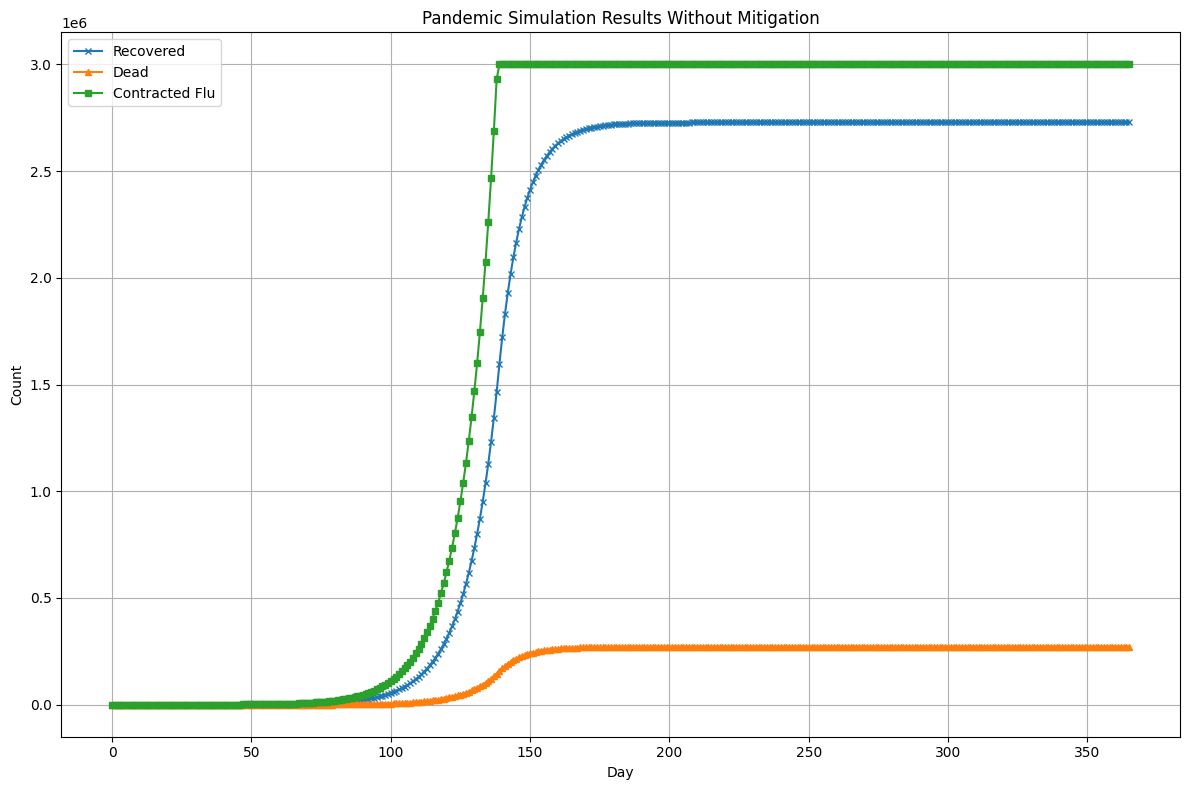

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initial conditions
population_size = 3000000
initial_infectious_count = 10
infection_probability = 0.02
recovery_rate = 0.1
death_rate = 0.01

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count
infectious_count = initial_infectious_count
recovered_count = 0
death_count = 0
total_contracted = initial_infectious_count  # Including initial infectious individuals
total_hospitalized = 0

# Simulation parameters
simulation_days = 365  # Adjust as needed

# Lists to store daily counts for plotting
daily_recovered = [0]
daily_dead = [0]
daily_contracted = [initial_infectious_count]
daily_hospitalized_list = [0]

# Simulation loop
day = 0
while day < simulation_days:
    day += 1
    new_infections = 0

    # Block 1: Calculating New Infections without Mitigation
    for _ in range(infectious_count):
        interactions_today = random.randint(5, 15)
        for _ in range(interactions_today):
            if random.random() < infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
                total_contracted += 1  # Update total contracted

    # Block 2: Updating Status with Stochastic Elements
    recoveries_today = np.random.binomial(infectious_count, recovery_rate)
    deaths_today = np.random.binomial(infectious_count, death_rate)
    infectious_count -= (recoveries_today + deaths_today)
    recovered_count += recoveries_today
    death_count += deaths_today
    infectious_count += new_infections  # Add new infections after updating recoveries and deaths

    # Append daily counts to lists for plotting
    daily_recovered.append(recovered_count)
    daily_dead.append(death_count)
    daily_contracted.append(total_contracted)
    daily_hospitalized_list.append(total_hospitalized)

# Reporting Final Outcomes
percentage_recovered = (recovered_count / population_size) * 100
percentage_dead = (death_count / population_size) * 100
percentage_contracted_flu = (total_contracted / population_size) * 100

print(f"Simulation ended on day {day}.")
print(f"Percentage recovered: {percentage_recovered:.2f}%")
print(f"Percentage dead: {percentage_dead:.2f}%")
print(f"Percentage contracted the flu: {percentage_contracted_flu:.2f}%")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(daily_recovered, label='Recovered', marker='x', linestyle='-', markersize=5)
plt.plot(daily_dead, label='Dead', marker='^', linestyle='-', markersize=5)
plt.plot(daily_contracted, label='Contracted Flu', marker='s', linestyle='-', markersize=5)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Pandemic Simulation Results Without Mitigation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Simulation with Vaccination but without Mask Wearing

Simulation ended on day 365.
Percentage vaccinated: 69.03%
Percentage recovered: 28.16%
Percentage dead: 2.81%
Percentage contracted the flu: 30.97%
Total cost: 248513400
Total cost: 10474982.375000004


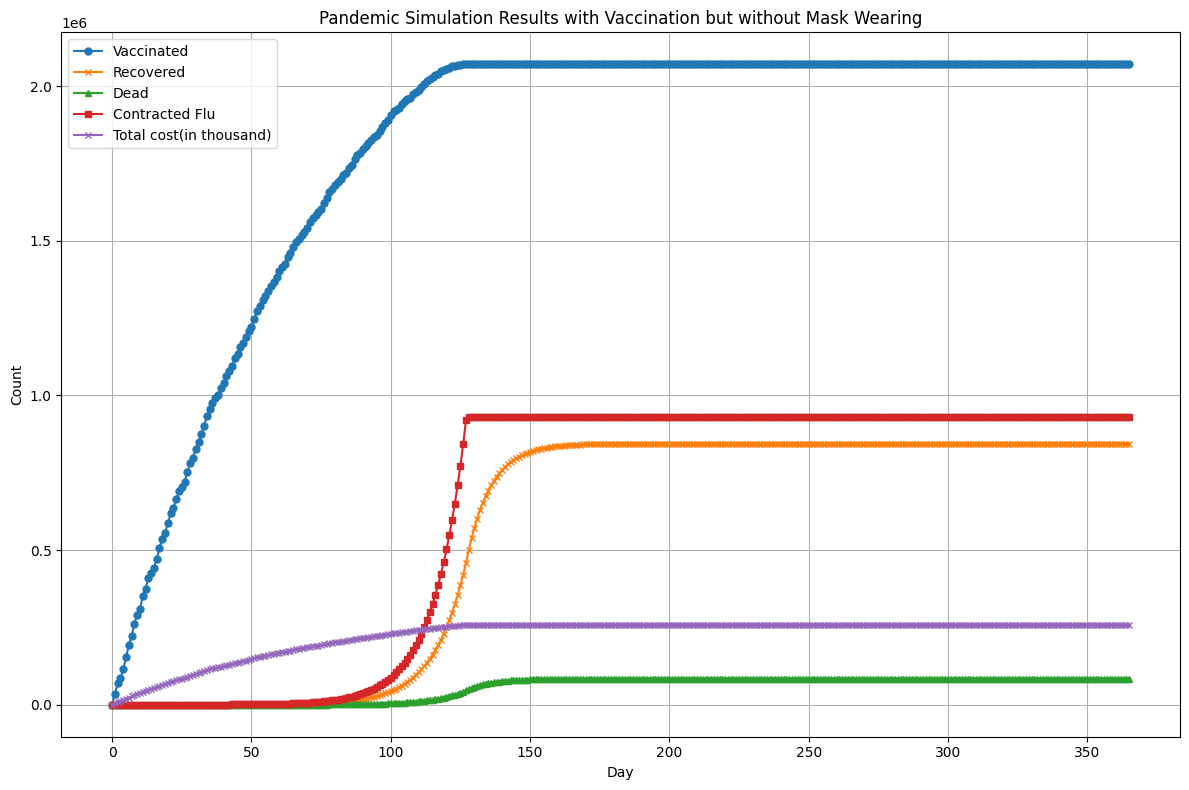

In [14]:
# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0
death_count = 0
total_contracted = initial_infectious_count  # Including initial infectious individuals
total_hospitalized = 0

# Simulation parameters
simulation_days = 365  # Adjust as needed
vaccination_threshold = 0.7 * population_size  # 70% of the population

# Lists to store daily counts for plotting
daily_vaccinated = [initial_vaccinated_count]
daily_recovered = [0]
daily_dead = [0]
daily_contracted = [initial_infectious_count]
daily_cost_list = [0]
daily_hospitalized_list = [0]

# Simulation loop
day = 0
while day < simulation_days and vaccinated_count < vaccination_threshold:
    day += 1
    new_infections = 0

    # Block 1: Calculating New Infections
    for _ in range(infectious_count):
        interactions_today = random.randint(5, 15)
        for _ in range(interactions_today):
            if random.random() < infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
                total_contracted += 1  # Update total contracted

    # Block 2: Updating Status with Stochastic Elements
    recoveries_today = np.random.binomial(infectious_count, recovery_rate)
    deaths_today = np.random.binomial(infectious_count, death_rate)
    infectious_count -= (recoveries_today + deaths_today)
    recovered_count += recoveries_today
    death_count += deaths_today
    infectious_count += new_infections  # Add new infections after updating recoveries and deaths

    # Block 3: Applying Vaccination with Stochastic Variation
    daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)
    vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)
    vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
    susceptible_count -= vaccines_administered_today
    vaccinated_count += vaccines_administered_today

    # Block 4:Calculate the total fee
    daily_hospitalized = new_infections * hospital_rate
    total_hospitalized += daily_hospitalized
    vaccine_cost_today = vaccine_cost * vaccines_administered_today
    total_vaccine_cost = vaccine_cost * vaccinated_count
    total_hospitalized_fee = total_hospitalized * hospital_fee
    total_fee = total_hospitalized_fee + total_vaccine_cost

    # Append daily counts to lists for plotting
    daily_vaccinated.append(vaccinated_count)
    daily_recovered.append(recovered_count)
    daily_dead.append(death_count)
    daily_contracted.append(total_contracted)
    daily_cost_list.append(total_fee/1000)
    daily_hospitalized_list.append(total_hospitalized)

# Reporting Final Outcomes
percentage_vaccinated = (vaccinated_count / population_size) * 100
percentage_recovered = (recovered_count / population_size) * 100
percentage_dead = (death_count / population_size) * 100
percentage_contracted_flu = (total_contracted / population_size) * 100

print(f"Simulation ended on day {day}.")
print(f"Percentage vaccinated: {percentage_vaccinated:.2f}%")
print(f"Percentage recovered: {percentage_recovered:.2f}%")
print(f"Percentage dead: {percentage_dead:.2f}%")
print(f"Percentage contracted the flu: {percentage_contracted_flu:.2f}%")
print(f"Total cost:",total_vaccine_cost)
print(f"Total cost:",total_hospitalized_fee)
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(daily_vaccinated, label='Vaccinated', marker='o', linestyle='-', markersize=5)
plt.plot(daily_recovered, label='Recovered', marker='x', linestyle='-', markersize=5)
plt.plot(daily_dead, label='Dead', marker='^', linestyle='-', markersize=5)
plt.plot(daily_contracted, label='Contracted Flu', marker='s', linestyle='-', markersize=5)
plt.plot(daily_cost_list, label='Total cost(in thousand)', marker='x', linestyle='-', markersize=5)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Pandemic Simulation Results with Vaccination but without Mask Wearing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Simulation with Vaccination and Mask Wearing

Simulation ended on day 123.
Percentage vaccinated: 70.09%
Percentage recovered: 0.05%
Percentage dead: 0.01%
Percentage contracted the flu: 0.07%
Total cost of vaccination: $252,315,840.00
Total cost of hospitalization: $23,091.20


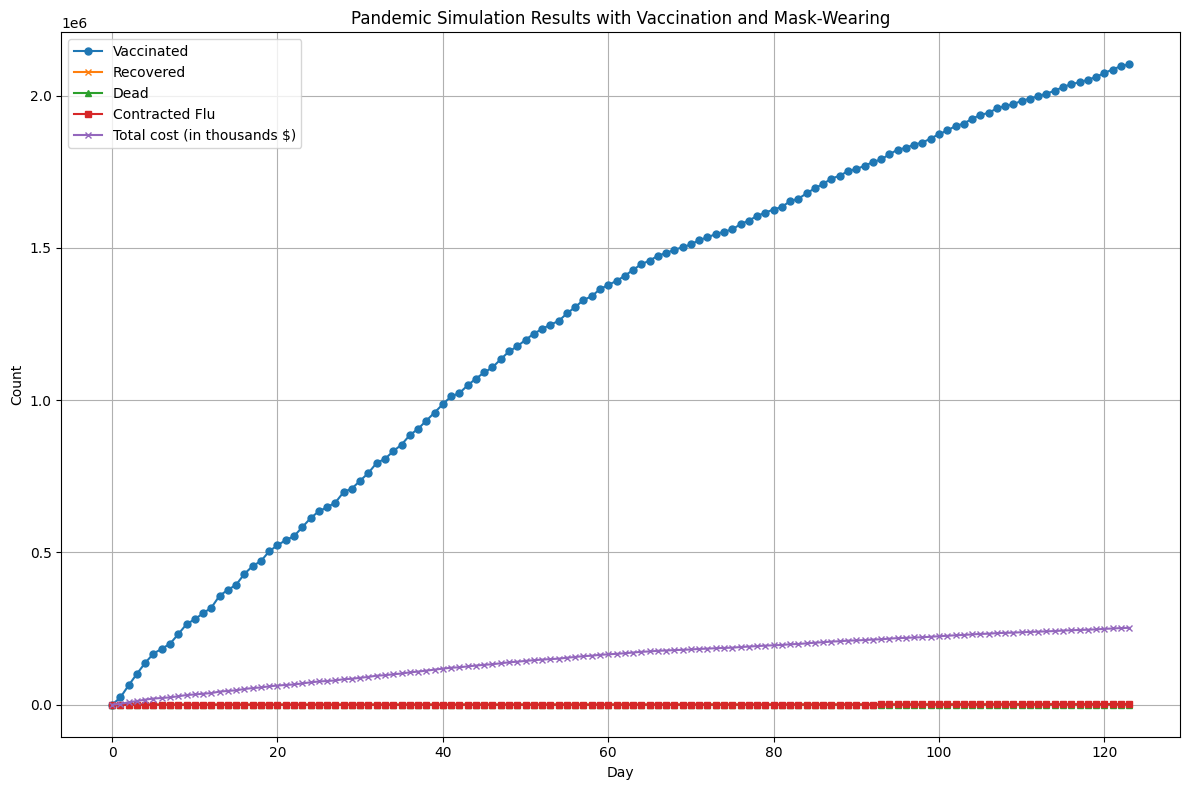

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initial conditions
population_size = 3000000
initial_infectious_count = 10
initial_vaccinated_count = 0
infection_probability = 0.02
recovery_rate = 0.1
death_rate = 0.01
base_vaccination_rate_percent = 0.01  # Base rate of 1% of the susceptible population per day
daily_variation_percent = 0.005  # Max daily variation in the vaccination rate
vaccine_cost = 120  # Vaccine cost
hospital_rate = 0.001  # Hospitalization rate
hospital_fee = 11275  # Hospital fee per patient

# Mask-wearing parameters
mask_adoption_rate = 0.5  # 50% of the population adopts mask-wearing
mask_efficacy = 0.5  # Masks reduce the transmission risk by 50%

# Calculating the initial number of susceptible individuals
susceptible_count = population_size - initial_infectious_count - initial_vaccinated_count
infectious_count = initial_infectious_count
vaccinated_count = initial_vaccinated_count
recovered_count = 0
death_count = 0
total_contracted = initial_infectious_count  # Including initial infectious individuals
total_hospitalized = 0

# Simulation parameters
simulation_days = 365  # Adjust as needed
vaccination_threshold = 0.7 * population_size  # 70% of the population

# Lists to store daily counts for plotting
daily_vaccinated = [initial_vaccinated_count]
daily_recovered = [0]
daily_dead = [0]
daily_contracted = [initial_infectious_count]
daily_cost_list = [0]
daily_hospitalized_list = [0]

# Simulation loop
day = 0
while day < simulation_days and vaccinated_count < vaccination_threshold:
    day += 1
    new_infections = 0

    # Block 1: Calculating New Infections with Mask Adjustment
    for _ in range(infectious_count):
        interactions_today = random.randint(5, 15)
        for _ in range(interactions_today):
            # Determine if both individuals are wearing masks
            if random.random() < mask_adoption_rate:
                # Adjust the infection probability based on mask efficacy
                adjusted_infection_probability = infection_probability * (1 - mask_efficacy)
            else:
                adjusted_infection_probability = infection_probability

            # Use the adjusted probability to determine if an infection occurs
            if random.random() < adjusted_infection_probability and susceptible_count > 0:
                new_infections += 1
                susceptible_count -= 1
                total_contracted += 1  # Update total contracted

    # Block 2: Updating Status with Stochastic Elements
    recoveries_today = np.random.binomial(infectious_count, recovery_rate)
    deaths_today = np.random.binomial(infectious_count, death_rate)
    infectious_count -= (recoveries_today + deaths_today)
    recovered_count += recoveries_today
    death_count += deaths_today
    infectious_count += new_infections  # Add new infections after updating recoveries and deaths

    # Block 3: Applying Vaccination with Stochastic Variation
    daily_vaccination_rate = base_vaccination_rate_percent + np.random.uniform(-daily_variation_percent, daily_variation_percent)
    vaccines_administered_today = int(susceptible_count * daily_vaccination_rate)
    vaccines_administered_today = min(vaccines_administered_today, susceptible_count)
    susceptible_count -= vaccines_administered_today
    vaccinated_count += vaccines_administered_today

    # Block 4: Calculate the total fee
    daily_hospitalized = new_infections * hospital_rate
    total_hospitalized += daily_hospitalized
    vaccine_cost_today = vaccine_cost * vaccines_administered_today
    total_vaccine_cost = vaccine_cost * vaccinated_count
    total_hospitalized_fee = total_hospitalized * hospital_fee
    total_fee = total_hospitalized_fee + total_vaccine_cost

    # Append daily counts to lists for plotting
    daily_vaccinated.append(vaccinated_count)
    daily_recovered.append(recovered_count)
    daily_dead.append(death_count)
    daily_contracted.append(total_contracted)
    daily_cost_list.append(total_fee/1000)
    daily_hospitalized_list.append(total_hospitalized)

# Reporting Final Outcomes
percentage_vaccinated = (vaccinated_count / population_size) * 100
percentage_recovered = (recovered_count / population_size) * 100
percentage_dead = (death_count / population_size) * 100
percentage_contracted_flu = (total_contracted / population_size) * 100

print(f"Simulation ended on day {day}.")
print(f"Percentage vaccinated: {percentage_vaccinated:.2f}%")
print(f"Percentage recovered: {percentage_recovered:.2f}%")
print(f"Percentage dead: {percentage_dead:.2f}%")
print(f"Percentage contracted the flu: {percentage_contracted_flu:.2f}%")
print(f"Total cost of vaccination: ${total_vaccine_cost:,.2f}")
print(f"Total cost of hospitalization: ${total_hospitalized_fee:,.2f}")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(daily_vaccinated, label='Vaccinated', marker='o', linestyle='-', markersize=5)
plt.plot(daily_recovered, label='Recovered', marker='x', linestyle='-', markersize=5)
plt.plot(daily_dead, label='Dead', marker='^', linestyle='-', markersize=5)
plt.plot(daily_contracted, label='Contracted Flu', marker='s', linestyle='-', markersize=5)
plt.plot(daily_cost_list, label='Total cost (in thousands $)', marker='x', linestyle='-', markersize=5)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Pandemic Simulation Results with Vaccination and Mask-Wearing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Mitigation Strategy 2: Quarantine

In [ ]:
#Compute associated economic cost of implementing quarantine
#A person who had prior contact with infected will carry out quarantine for 7 days at a facility or home to curb spread
#Costs - loss of income, cost of quarantine, hospital wages, healthcare costs

import random
import matplotlib.pyplot as plt

# Initial conditions
population_size = 10000 # Number of people in the population
infection_probability = 0.02
num_days_quarantined = 7  # Number of days in quarantine
quarantine_cost_per_person_per_day = 100  # Cost of quarantine per person per day
avg_daily_wage = 200
avg_daily_wage_hospital_staff = 200
num_quarantine_facilities = 100
num_additional_staff_per_facility = 10
quarantine_rate = 0.01

# Calculate the cost of quarantine
quarantine_cost = population_size * infection_probability * num_days_quarantined * quarantine_cost_per_person_per_day

# Cost of lost income from not working
lost_income = population_size * infection_probability * avg_daily_wage * num_days_quarantined

# Cost of additional hospital staff needed for quarantine at quarantine facilities
cost_hospital_staff = num_quarantine_facilities * num_additional_staff_per_facility * avg_daily_wage_hospital_staff * num_days_quarantined

# Total economic cost of quarantine
total_cost = quarantine_cost + lost_income + cost_hospital_staff
print("Total cost of quarantine:", total_cost)


# Define the parameters of the simulation
num_days = 365
num_people = 100000
infection_rate = 0.1
death_rate = 0.01
quarantine_cost = 100
death_cost = 10000

# Initialize the lists to store the data
days = []
total_infections = []
total_deaths = []
total_quarantine_cost = []
total_death_cost = []

# Run the simulation for each day
for day in range(num_days):
    # Update the number of infections and deaths
    new_infections = num_people * infection_rate
    new_deaths = num_people * death_rate

    # Update the total costs
    total_quarantine_cost.append(quarantine_cost * num_people)
    total_death_cost.append(death_cost * new_deaths)

    # Update the lists
    days.append(day)
    total_infections.append(new_infections)
    total_deaths.append(new_deaths)

Total cost of quarantine: 1820000.0


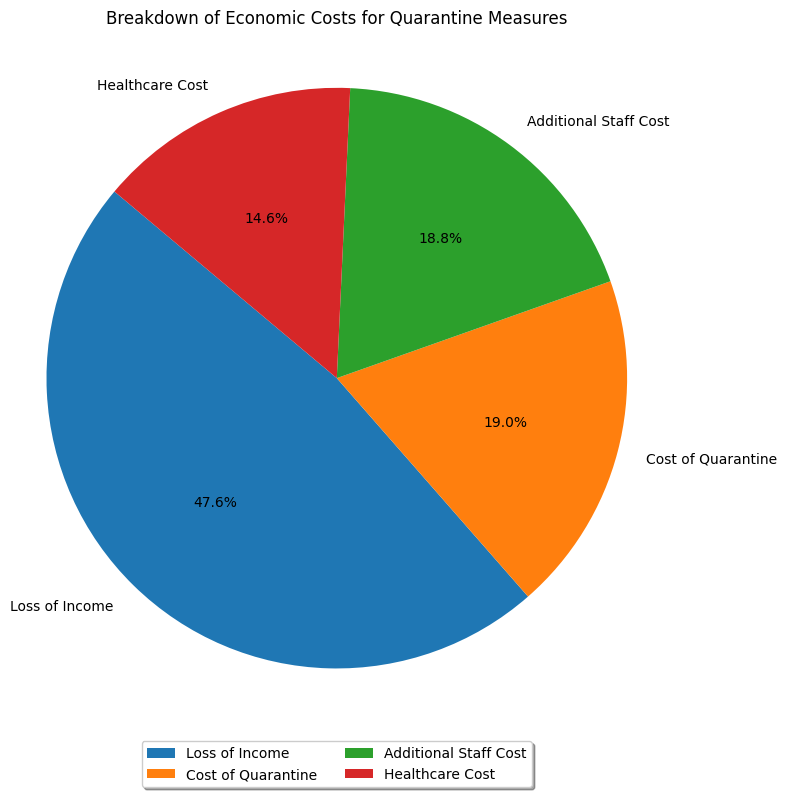

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate economic costs
def simulate_costs(num_samples):
    # Assuming normal distribution for loss of income with mean $5000 and standard deviation $1000
    loss_of_income = np.random.normal(loc=5000, scale=1000, size=num_samples)

    # Assuming uniform distribution for cost of quarantine ranging from $1000 to $3000
    cost_of_quarantine = np.random.uniform(1000, 3000, size=num_samples)

    # Assuming normal distribution for additional staff cost with mean $2000 and standard deviation $500
    additional_staff_cost = np.random.normal(loc=2000, scale=500, size=num_samples)

    # Assuming exponential distribution for healthcare cost with mean $1500
    healthcare_cost = np.random.exponential(scale=1500, size=num_samples)

    total_cost = loss_of_income + cost_of_quarantine + additional_staff_cost + healthcare_cost
    return loss_of_income, cost_of_quarantine, additional_staff_cost, healthcare_cost, total_cost

# Simulation parameters
num_samples = 1000

# Simulate costs
loss_of_income, cost_of_quarantine, additional_staff_cost, healthcare_cost, total_cost = simulate_costs(num_samples)

# Plotting the breakdown chart
labels = ['Loss of Income', 'Cost of Quarantine', 'Additional Staff Cost', 'Healthcare Cost']
mean_values = [loss_of_income.mean(), cost_of_quarantine.mean(), additional_staff_cost.mean(), healthcare_cost.mean()]

plt.figure(figsize=(8, 8))
plt.pie(mean_values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Economic Costs for Quarantine Measures')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
plt.tight_layout()
plt.show()